In [11]:
 # The merger rate of the PBH binaries with DM halos assuming that t_merge holds for vaccum only.
 # m_j = m_2
# m_i = m_1  and m_2< equal to m_1.   
    
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams


plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_eq = 1.59246e12/yr      # in units of seconds
k = 22.5707
σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries with halos for PBHs mass range of 5 M☉-100 M☉ .
def merger_rate_halo_1(m_1,m_2,Δ_1,Δ_2,t_m):
    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))
    
    
    def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
        return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))
    
    def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))
  
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    def M_1halo(m_1, m_2, Δ_1, Δ_2, X):
        return (((16*π)/3)*ρ_bar(m_1)*((2*G*m_1*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
    
    
    def M_2halo(m_1, m_2, Δ_1, Δ_2, X):
        return (((16*π)/3)*ρ_bar(m_2)*((2*G*m_2*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
    
 
    def M_1(m_1, m_2, Δ_1, Δ_2, X):
        return (m_1 + M_1halo(m_1, m_2, Δ_1, Δ_2, X))
    
    def M_2(m_1, m_2, Δ_1, Δ_2, X):
        return (m_2 + M_2halo(m_1, m_2, Δ_1, Δ_2, X))
    
    def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
        return (m_1 + m_2 + M_1halo(m_1, m_2, Δ_1, Δ_2, X) + M_2halo(m_1, m_2, Δ_1, Δ_2, X))
    
    
    #Schwarzchild Radius of the PBH.
    def r_s(m): 
        return ((2*G*m)/(c**2)) 


    #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
    def r_ta(m): 
        return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


    # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
    def E_b(m): 
        return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))
    
    
    
    def a_i_by_x(m_1, m_2, Δ_1, Δ_2, X):
        return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2))


    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))**(1/3))
    
    
    def a_initial(m_1, m_2, Δ_1, Δ_2, X):
        return a_i_by_x(m_1, m_2, Δ_1, Δ_2, X) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

    def beta(m_1,m_2,Δ_1, Δ_2, X):
        return ((G * m_1 * m_2)/((G * M_1(m_1, m_2, Δ_1, Δ_2, X) * M_2(m_1, m_2, Δ_1, Δ_2, X))-(2 * a_initial(m_1, m_2, Δ_1, Δ_2, X) * (E_b(m_1) + E_b(m_2)))))

    
    k = 22.3387
    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    def B_halo(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * ((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14))
    
    
    X = np.geomspace(1e-5, 1e5 ,1000000) 
   
    
    def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
        return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
    
    def PDF(m):
        return (P(m)/m)

    
    I = quad(PDF, 5, np.inf)  # Taking limits of the PBH mass from 5 M☉ to 100 M☉ instead of 
                               # 0 to infinity.
    
    n_T = f * ρ_eq * I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 
   
    
    def integrand(m_1,m_2,Δ_1,Δ_2, X):
        return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))

    
    
    return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 


In [12]:
m_1 = 7   #in units of M☉
m_2 = 9  #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉
Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


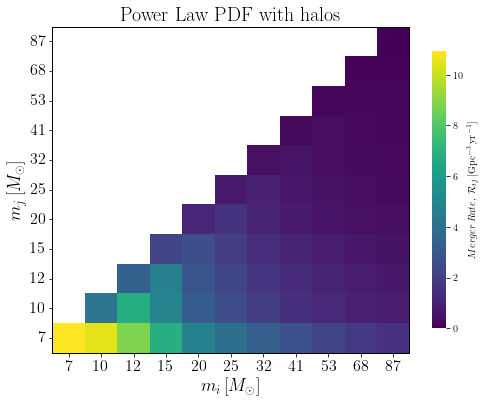

In [13]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_haloPWR_1 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 4.3e-3
        f = 0.85 * f_pbh
        
          
        def P(m):      #Powerlaw PBH mass distribution
            α = 1.6
            M = 5      #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_haloPWR_1[i,j] = 0.5*merger_rate_halo_1(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)
            
        else:
            Merger_haloPWR_1[i,j] = merger_rate_halo_1(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)   
    
        

np.save("Merger_haloPWR_1", Merger_haloPWR_1)




# Plot of merger rate for Power Law PBH mass function.

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6)) 



ax = sns.heatmap(Merger_haloPWR_1, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

ax.set_xticklabels(m_1_list, fontsize = 16)
ax.set_yticklabels(m_2_list,rotation = 360, fontsize = 16)


ax.invert_yaxis()
plt.xlabel('$m_{i}\,[M_{\odot}]$', fontsize = 18)
plt.ylabel('$m_{j}\,[M_{\odot}]$', fontsize = 18)
plt.title('Power Law PDF with halos', fontsize=20)
plt.savefig('1hPWRLawDM.pdf')
plt.show()    

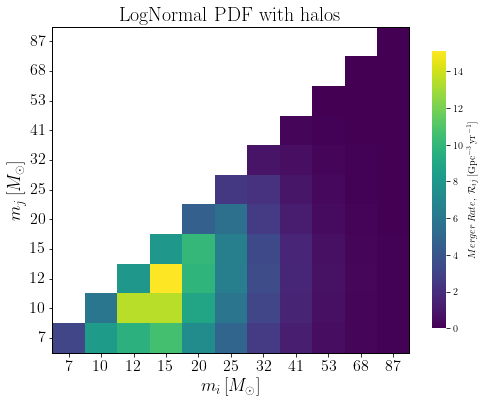

In [14]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_haloLognormal_1 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 3.7e-3
        f = 0.85*f_pbh 
        
        def P(m):      #Log-Normal PBH mass Distribution
            σ = 0.6
            m_c = 15   #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_haloLognormal_1[i, j] = 0.5 * merger_rate_halo_1(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)
            
        else:
            Merger_haloLognormal_1[i, j] = merger_rate_halo_1(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            

np.save("Merger_haloLognormal_1", Merger_haloLognormal_1)


# Plot of merger rate for LogNormal PBH mass function.

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6)) 



ax = sns.heatmap(Merger_haloLognormal_1, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

ax.set_xticklabels(m_1_list, fontsize = 16)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 16)


ax.invert_yaxis()
plt.xlabel('$m_{i}\,[M_{\odot}]$', fontsize = 18)
plt.ylabel('$m_{j}\,[M_{\odot}]$', fontsize = 18)
plt.title('LogNormal PDF with halos', fontsize = 20)
plt.savefig('1hLogNormalPDF.pdf')
plt.show()    

In [15]:
# Merger rate of  PBH binaries without halos for PBHs mass range of 1e-3 M☉-100 M☉ .
def merger_rate_halo_2(m_1,m_2,Δ_1,Δ_2,t_m):
    
    def f_(m):
        return f*P(m)
    
    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)
    
    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))
    
    
    def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
        return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))
    
    def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
        return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))
  
    
    def ρ_bar(m):
        return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 
    
    def M_1halo(m_1, m_2, Δ_1, Δ_2, X):
        return (((16*π)/3)*ρ_bar(m_1)*((2*G*m_1*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
    
    
    def M_2halo(m_1, m_2, Δ_1, Δ_2, X):
        return (((16*π)/3)*ρ_bar(m_2)*((2*G*m_2*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
    

    def M_1(m_1, m_2, Δ_1, Δ_2, X):
        return (m_1 + M_1halo(m_1, m_2, Δ_1, Δ_2, X))
    
    def M_2(m_1, m_2, Δ_1, Δ_2, X):
        return (m_2 + M_2halo(m_1, m_2, Δ_1, Δ_2, X))
    
    
    
    def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
        return (m_1 + m_2 + M_1halo(m_1, m_2, Δ_1, Δ_2, X) + M_2halo(m_1, m_2, Δ_1, Δ_2, X))
    
    
    
    #Schwarzchild Radius of the PBH.
    def r_s(m): 
        return ((2*G*m)/(c**2)) 


    #r_turnaround of the dark matter halos, eq.(5) in "WIMPs and stellar-mass primordial black holes are incompatible"
    def r_ta(m): 
        return ((2*G*m*(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/3))


    # The binding energy, E_b of the dark matter halos calculated within r_s and r_ta for dark matter halo's density profile of ρ(r)∝ r^{-9/4}
    def E_b(m): 
        return ((16*π*G*ρ_bar(m)*m*(((r_ta(m))**(-1/4))-((r_s(m))**(-1/4))))-((128/3)*G*(π**2)*(ρ_bar(m)**2)*(((r_ta(m))**(1/2))-((r_s(m))**(1/2)))))
    
    
    
    def a_i_by_x(m_1, m_2, Δ_1, Δ_2, X):
        return  (0.0977* λ(m_1, m_2, Δ_1, Δ_2, X) + 0.0057 * (λ(m_1, m_2, Δ_1, Δ_2, X)**2))


    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3*(m_1+m_2))/(8*π*ρ_eq*f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2)))**(1/3))
    
    
    def a_initial(m_1, m_2, Δ_1, Δ_2, X):
        return a_i_by_x(m_1, m_2, Δ_1, Δ_2, X) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))

    def beta(m_1,m_2,Δ_1, Δ_2, X):
        return ((G*m_1*m_2)/((G*M_1(m_1, m_2, Δ_1, Δ_2, X)*M_2(m_1, m_2, Δ_1, Δ_2, X))-(2*a_initial(m_1, m_2, Δ_1, Δ_2, X)*(E_b(m_1)+E_b(m_2)))))

    
    k = 22.3387
    A=((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

    def B_halo(m_1,m_2,Δ_1,Δ_2):
        return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7))  *   ((m_1 + m_2)**(-23/42)) * np.sqrt(M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) *((f_b(m_1,m_2))**(37/21))* ((f**2 + 0.2998 *(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42)) * (beta(m_1,m_2,Δ_1, Δ_2, X)**(-1/14))
    
    
    X = np.geomspace(1e-5, 1e5 ,1000000) 
   
    
    def γ_X(m_1,m_2,Δ_1,Δ_2, X):      #eq.(12) in the notes.
        return (((1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_halo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))
    
    def PDF(m):
        return (P(m)/m)

    
    I = quad(PDF, 1e-3, np.inf)    # Taking limits of the PBH mass from 1e-3 M☉ to 100 M☉ instead of 
                                   # 0 to infinity.
    
    n_T = f * ρ_eq * I[0]         #n_T=f*ρ_eq∫(P(m)/m)*dm 
   
    
    def integrand(m_1,m_2,Δ_1,Δ_2, X):
        return  np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2)))

    
    
    return (1/(14 * t_m)) *  ρ_m *  ((f**2)/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))) *  (m_1 + m_2) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2)  * (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X)) 


In [16]:
m_1 = np.geomspace(1e-3, 100, 11)
m_2 = np.geomspace(1e-3, 100, 11)

m_1_list = m_1.tolist()
m_2_list = m_2.tolist()


print("m_1 = ", m_1_list)

Δ_1_list = np.zeros(len(m_1_list))
Δ_2_list = np.zeros(len(m_2_list))



for i, (m_1, m_2)  in enumerate(zip(m_1_list, m_2_list)):
    y = np.log(m_1)
    dy =  np.log(m_1) - np.log(0.5 * m_2)
    Δ_1_list[i] =  Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    




# Formatting x and y-axis labels.

def sciformat_3(x):
    n = np.floor(np.log10(x))
    m = x*(10.0**(-n))
    str1 = ""
    if (n in [0, 1]):
        return r'$%d$'%(x,)
    elif (m > 1.001):
        str1 = r'$%d \times ' % (m,)
        str2 = r'10^{%d}$' % n
    else:
        str2 = r'$10^{%d}$' % n
    return str1 + str2

xlabel_list = np.zeros(len(m_1_list), dtype ='U100')
ylabel_list = np.zeros(len(m_2_list), dtype ='U100')

for i, x in enumerate(m_1_list):
    xlabel_list[i] = sciformat_3(x)
    
for i, x in enumerate(m_2_list):
    ylabel_list[i] = sciformat_3(x)
 


m_1 =  [0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0]


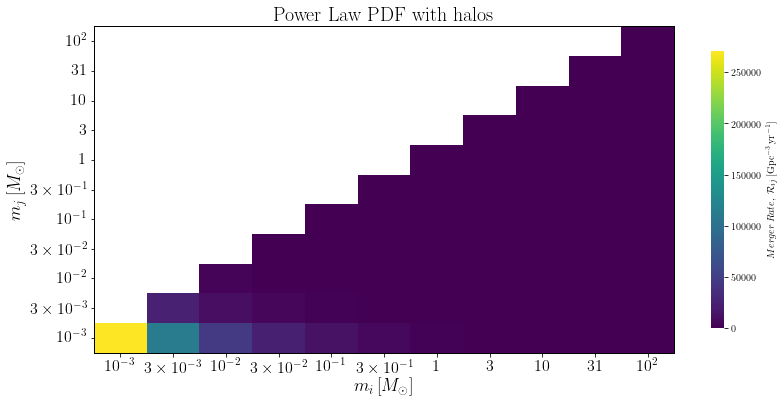

In [17]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_haloPWR_2 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 4.3e-3
        f = 0.85 * f_pbh
        
          
        def P(m): #Powerlaw PBH mass distribution
            α = 1.6
            M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_haloPWR_2[i,j] = 0.5*merger_rate_halo_2(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)
            
        else:
            Merger_haloPWR_2[i,j] = merger_rate_halo_2(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)   
    
        

np.save("Merger_haloPWR_2", Merger_haloPWR_2)




# Plot of merger rate for Power Law PBH mass function.

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize = (13, 6)) 



ax = sns.heatmap(Merger_haloPWR_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

ax.set_xticklabels(xlabel_list, fontsize = 16)
ax.set_yticklabels(ylabel_list,rotation = 360, fontsize = 16)


ax.invert_yaxis()
plt.xlabel('$m_{i}\,[M_{\odot}]$', fontsize = 18)
plt.ylabel('$m_{j}\,[M_{\odot}]$', fontsize = 18)
plt.title('Power Law PDF with halos', fontsize = 20)
plt.savefig('2hPWRLawDM.pdf')
plt.show()    

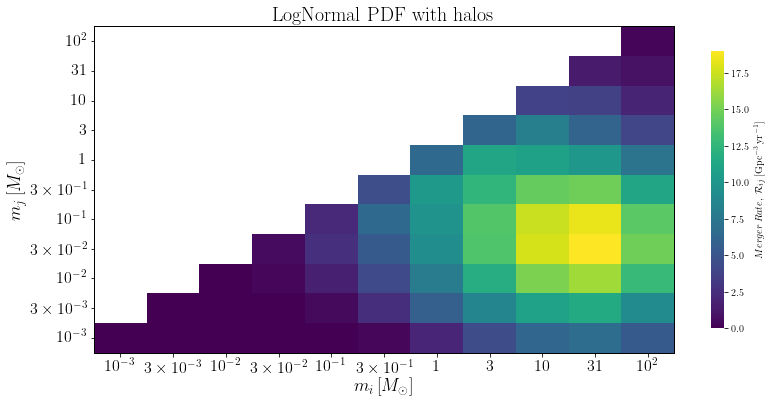

In [18]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


Merger_haloLognormal_2 = np.zeros((11, 11))


for i in range(11):
    for j in range(11):
        
        f_pbh = 3.7e-3
        f = 0.85*f_pbh 
        
        def P(m):               #Log-Normal PBH mass Distribution
            σ = 2.6
            m_c = 30               #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
            return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))

        if i==j:
            Merger_haloLognormal_2[i, j] = 0.5 * merger_rate_halo_2(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],  t_m)
            
        else:
            Merger_haloLognormal_2[i, j] = merger_rate_halo_2(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m)
            

np.save("Merger_haloLognormal_2", Merger_haloLognormal_2)


# Plot of merger rate for LogNormal PBH mass function.

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(13, 6)) 



ax = sns.heatmap(Merger_haloLognormal_2, mask = mask,  cmap = 'viridis', cbar = True, 
                 cbar_kws = {"shrink": 0.85,'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                 vmin = 0)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    

plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['font.family'] = 'serif'

ax.set_xticklabels(xlabel_list, fontsize = 16)
ax.set_yticklabels(ylabel_list, rotation = 360, fontsize = 16)


ax.invert_yaxis()
plt.xlabel('$m_{i}\,[M_{\odot}]$', fontsize = 18)
plt.ylabel('$m_{j}\,[M_{\odot}]$', fontsize = 18)
plt.title('LogNormal PDF with halos', fontsize = 20)
plt.savefig('2hLogNormalPDF.pdf')
plt.show()    